In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [11]:
def get_data(num_points):
    w_one = 0.6 * np.sin(np.arange(0,num_points))
    w_two = 3.5 * np.sin(np.arange(0,num_points))
    w_three = 1.2 * np.sin(np.arange(0,num_points))
    w_four = 4.6 * np.sin(np.arange(0,num_points))
    
    a_one = np.ones(num_points)
    a_two = 2.2 + np.zeros(num_points)
    a_three = 3.1 * np.ones(num_points)
    a_four = 0.9 + np.ones(num_points)
    
    wave = np.array([w_one,w_two,w_three,w_four]).reshape(num_points*4,1)
    amp = np.array([a_one,a_two,a_three,a_four]).reshape(num_points*4,1)
    return wave,amp

def visualize_output(nn,num_points_test):
    wave,amp = get_data(num_points_test)
    output = nn.sin(wave)
    plt.plot(amp.reshape(num_points_test*4))
    plt.plot(output.reshape(num_points_test*4))

if __name__=='__main__':
    num_points = 50
    wave,amp = get_data(num_points)

In [12]:
nn = nl.net.newelm([[-2,2]],[10,1],[nl.trans.TanSig(),nl.trans.PureLin()])

In [13]:
nn.layers[0].initf = nl.init.InitRand([-0.1,0.1],'wb')
nn.layers[1].initf = nl.init.InitRand([-0.1,0.1],'wb')
nn.init()

Epoch: 100; Error: 0.5627264487208439;
Epoch: 200; Error: 0.563935976409954;
Epoch: 300; Error: 0.5724289088875252;
Epoch: 400; Error: 0.5624873613199299;
Epoch: 500; Error: 0.6307504300868734;
Epoch: 600; Error: 0.5686417926211607;
Epoch: 700; Error: 0.5654495141008151;
Epoch: 800; Error: 0.561564187021094;
Epoch: 900; Error: 0.30862926399177276;
Epoch: 1000; Error: 0.10509584423959314;
Epoch: 1100; Error: 0.05654902218226731;
Epoch: 1200; Error: 0.045549144796714104;
The maximum number of train epochs is reached


AttributeError: 'Net' object has no attribute 'sin'

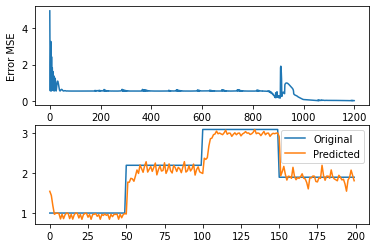

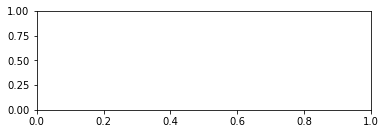

In [14]:
error = nn.train(wave,amp,epochs = 1200,show=100,goal=0.01)

output = nn.sim(wave)

plt.subplot(211)
plt.plot(error)
plt.xlabel('#Epochs')
plt.ylabel('Error MSE')

plt.subplot(212)
plt.plot(amp.reshape(num_points*4))
plt.plot(output.reshape(num_points*4))
plt.legend(['Original','Predicted'])

plt.figure()
plt.subplot(211)
visualize_output(nn,82)
plt.xlim([0,300])

plt.subplot(212)
visualize_output(nn,49)
plt.xlim([0,300])
plt.show()